In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/Bakery sales.csv')

In [ ]:
df

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"
...,...,...,...,...,...,...,...
234000,511387,2022-09-30,18:52,288911.0,COUPE,1.0,"0,15 €"
234001,511388,2022-09-30,18:52,288911.0,BOULE 200G,1.0,"1,20 €"
234002,511389,2022-09-30,18:52,288911.0,COUPE,2.0,"0,15 €"
234003,511392,2022-09-30,18:55,288912.0,TRADITIONAL BAGUETTE,1.0,"1,30 €"


In [ ]:
df.shape

(234005, 7)

In [ ]:
df.head()

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


In [ ]:
df.tail()

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
234000,511387,2022-09-30,18:52,288911.0,COUPE,1.0,"0,15 €"
234001,511388,2022-09-30,18:52,288911.0,BOULE 200G,1.0,"1,20 €"
234002,511389,2022-09-30,18:52,288911.0,COUPE,2.0,"0,15 €"
234003,511392,2022-09-30,18:55,288912.0,TRADITIONAL BAGUETTE,1.0,"1,30 €"
234004,511395,2022-09-30,18:56,288913.0,TRADITIONAL BAGUETTE,1.0,"1,30 €"


In [ ]:
df.describe()

,Unnamed: 0,ticket_number,Quantity
count,234005.000000,234005.000000,234005.000000
mean,255205.035854,219201.258738,1.538377
std,147501.625992,40053.223896,1.289603
min,0.000000,150040.000000,-200.000000
25%,127979.000000,184754.000000,1.000000
50%,254573.000000,218807.000000,1.000000
75%,382911.000000,253927.000000,2.000000
max,511395.000000,288913.000000,200.000000


In [ ]:
df.shape

(234005, 7)

In [ ]:
df.columns

Index(['Unnamed: 0', 'date', 'time', 'ticket_number', 'article', 'Quantity',
       'unit_price'],
      dtype='object')

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
date,0
time,0
ticket_number,0
article,0
Quantity,0
unit_price,0


In [ ]:
df['ticket_number'].value_counts()

,count
ticket_number,
225766.0,13
202116.0,12
155163.0,12
241088.0,12
227073.0,12
...,...
288896.0,1
288895.0,1
288894.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     234005 non-null  int64  
 1   date           234005 non-null  object 
 2   time           234005 non-null  object 
 3   ticket_number  234005 non-null  float64
 4   article        234005 non-null  object 
 5   Quantity       234005 non-null  float64
 6   unit_price     234005 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 12.5+ MB


In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
fig = px.histogram(df,x='Quantity')
fig.show()

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.drop_duplicates()
df.shape

(234005, 7)

In [ ]:
df.dtypes

,0
Unnamed: 0,int64
date,object
time,object
ticket_number,float64
article,object
Quantity,float64
unit_price,object


In [ ]:
df = df.rename(columns = {'date' : 'Date',
                         'time' : 'Time',
                          'ticket_number' : 'Transaction_id',
                          'article' : 'Menu',
                          'unit_price' : 'Price'})

In [ ]:
df['Menu'] = df['Menu'].str.title()

In [ ]:
df = df.replace(to_replace = {'Quantity' : {'.' : ' '}, # np.NaN
                              'Price' : {'€' : ' ' , ',' : '.' }}, regex=True)

In [ ]:
df = df.astype({'Quantity' : 'int',
                'Price' : 'float',
                'Transaction_id' : 'int',
                'Menu' : 'str'})

In [ ]:
df = df[(df['Price'] > 0) & (df['Quantity'] > 0)]

In [ ]:
df['Revenue'] = df['Quantity'] * df['Price']

In [ ]:
df.head()

,Unnamed: 0,Date,Time,Transaction_id,Menu,Quantity,Price,Revenue
0,0,2021-01-02,08:38,150040,Baguette,1,0.90,0.90
1,1,2021-01-02,08:38,150040,Pain Au Chocolat,3,1.20,3.60
2,4,2021-01-02,09:14,150041,Pain Au Chocolat,2,1.20,2.40
3,5,2021-01-02,09:14,150041,Pain,1,1.15,1.15
4,8,2021-01-02,09:25,150042,Traditional Baguette,5,1.20,6.00


In [ ]:
df['Quantity'].value_counts()

,count
Quantity,
1,156683
2,49365
3,13677
4,7075
5,2758
6,1548
8,487
7,474
10,379


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Day_time'] = pd.to_datetime(df['Time']).dt.hour
df['Day_time'].unique()

<ipython-input-198-f8001c58267a>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



array([ 8,  9, 10, 11, 12, 13, 14, 17, 18, 19,  7, 16, 15, 20],
      dtype=int32)

In [ ]:
# Extract day and year from the 'Date' column
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year

# Now you can select these columns
df = df[['Quantity', 'Price', 'Revenue', 'Day', 'Year', 'Day_time']]

In [ ]:
df

,Quantity,Price,Revenue,Day,Year,Day_time
0,1,0.90,0.90,2,2021,8
1,3,1.20,3.60,2,2021,8
2,2,1.20,2.40,2,2021,9
3,1,1.15,1.15,2,2021,9
4,5,1.20,6.00,2,2021,9
...,...,...,...,...,...,...
234000,1,0.15,0.15,30,2022,18
234001,1,1.20,1.20,30,2022,18
234002,2,0.15,0.30,30,2022,18
234003,1,1.30,1.30,30,2022,18


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'Revenue' is the target variable
# Replace 'Revenue' with your actual target variable column name if different
X = df[['Quantity', 'Price', 'Day', 'Year', 'Day_time']]  # Features
y = df['Revenue']  # Target variable

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can proceed with your model training
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Assuming 'df' is your DataFrame containing the correct features
# ['Quantity', 'Price', 'Revenue', 'Day', 'Year', 'Day_time']

# Split the data into training and testing sets
X = df[['Quantity', 'Price', 'Day', 'Year', 'Day_time']]
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Make predictions using the correct DataFrames (X_train, X_test)
y_pred_train_lr = model_lr.predict(X_train)
y_pred_test_lr = model_lr.predict(X_test)

# ... (rest of your code for calculating metrics)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split # Import train_test_split


# Assuming X_train and y_train are your training data
# Re-assign X_train to train_x and y_train to train_y
# It's best to perform train_test_split here if not done before
# to make sure test_x is defined
x = df.drop('Revenue',axis=1) # Assuming df is your original DataFrame
y = df['Revenue']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 42)

model_lr = LinearRegression()
model_lr.fit(train_x, train_y)

y_pred_train_lr=model_lr.predict(train_x)
y_pred_test_lr=model_lr.predict(test_x) # Now test_x is defined

In [ ]:
y_pred_train_lr=model_lr.predict(train_x)
y_pred_test_lr=model_lr.predict(test_x)
train_mse_lr=mean_squared_error(train_y,y_pred_train_lr)
test_mse_lr=mean_squared_error(test_y,y_pred_test_lr)
train_r2_lr=r2_score(train_y,y_pred_train_lr)
test_r2_lr=r2_score(test_y,y_pred_test_lr)

In [ ]:
print(train_mse_lr)
print(test_mse_lr)
print(train_r2_lr)
print(test_r2_lr)

0.7657712436328369
1.0033428053811546
0.8791403733026657
0.8598014940223188


In [ ]:
!pip install scikit-learn
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming train_x, train_y, test_x, test_y are defined from previous cells

# Initialize and train the KNN model
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(train_x, train_y)

# Make predictions
y_pred_train_knn = model_knn.predict(train_x)
y_pred_test_knn = model_knn.predict(test_x)  # Define y_pred_test_knn before using it

# Calculate and print metrics
mae = mean_absolute_error(test_y, y_pred_test_knn)
print("MAE of the knn model on your test dataset:", mae)

mse = mean_squared_error(test_y, y_pred_test_knn)
print("MSE of the knn model on your test dataset:", mse)

rmse = np.sqrt(mse)
print("RMSE of the knn model on your test dataset:", rmse)

r2 = r2_score(test_y, y_pred_test_knn)
print("R-squared of the knn model on your test dataset:", r2)

MAE of the knn model on your test dataset: 0.12409139877370925
MSE of the knn model on your test dataset: 0.8378359155349262
RMSE of the knn model on your test dataset: 0.9153337727490045
R-squared of the knn model on your test dataset: 0.8829280052814882


In [ ]:
print("Accuracy of the KNN model on your train dataset,accuracy_train")
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Import regression metrics

# Calculate MAE
mae = mean_absolute_error(train_y, y_pred_train_knn)
print("MAE of the knn on your train dataset", mae)

# Calculate MSE
mse = mean_squared_error(train_y, y_pred_train_knn)
print("MSE of the knn on your train dataset", mse)

# Calculate RMSE
rmse = np.sqrt(mse)  # Assuming you have imported numpy as np
print("RMSE of the knn on your train dataset", rmse)

# Calculate R-squared
r2 = r2_score(train_y, y_pred_train_knn)
print("R2 of the knn on your train dataset", r2)

Accuracy of the KNN model on your train dataset,accuracy_train
MAE of the knn on your train dataset 0.0866424313123561
MSE of the knn on your train dataset 0.2552245962118189
RMSE of the knn on your train dataset 0.505197581359827
R2 of the knn on your train dataset 0.9597185847880595


In [ ]:
print(y_pred_train_knn)

[2.8  2.06 2.5  ... 1.2  0.66 3.6 ]


In [ ]:
print(y_pred_test_knn)

[5.4 1.3 1.3 ... 1.8 4.  1.2]


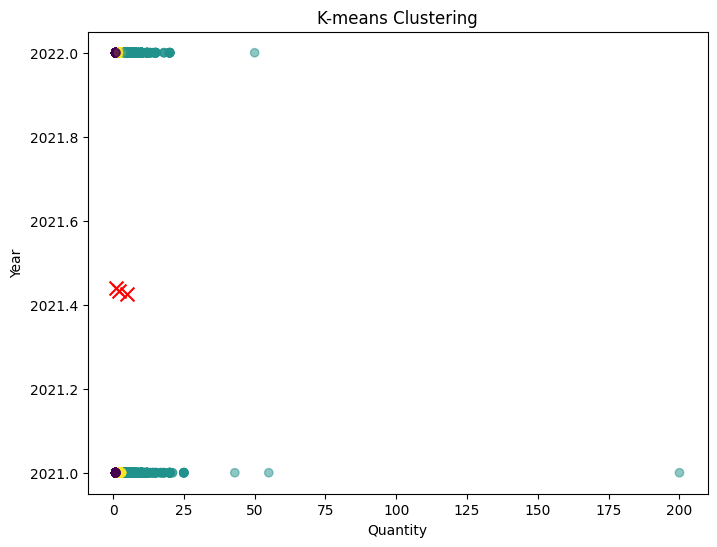

In [ ]:
from sklearn.cluster import KMeans
k=3
model_kmeans=KMeans(n_clusters=k,random_state=42)
columns_for_cllustering=["Quantity","Year"] # Change 'year' to 'Year'
df_for_clustering=df[columns_for_cllustering]
model_kmeans.fit(df_for_clustering)
cluster_labels=model_kmeans.labels_
cluster_centers=model_kmeans.cluster_centers_
plt.figure(figsize=(8,6))
plt.scatter(df_for_clustering['Quantity'],df_for_clustering['Year'],c=cluster_labels,cmap='viridis',alpha=0.5) # Change 'year' to 'Year'
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],marker='x',s=100,color='red')
plt.xlabel("Quantity")
plt.ylabel("Year") # Change 'year' to 'Year'
plt.title("K-means Clustering")
#plt.legend() # legend might not be necessary if not specifying specific labels for the scatter plots
plt.show()

In [ ]:
df = pd.read_csv('/content/Bakery sales.csv') # Reload your data
   # ... (your data cleaning and transformation steps) ...

In [ ]:
import pandas as pd

# Reload your data
df = pd.read_csv('/content/Bakery sales.csv')

# Rename the columns
df = df.rename(
    columns={
        'date': 'Date',
        'time': 'Time',
        'ticket_number': 'Transaction_id',
        'article': 'Menu',
        'unit_price': 'Price'
    }
)

# Data Cleaning and Transformation Steps (re-apply from previous cells)
df['Menu'] = df['Menu'].str.title()
df = df.replace(
    to_replace={
        'Quantity': {
            '.': ' '
        },  # np.NaN
        'Price': {
            '€': ' ',
            ',': '.'
        }
    },
    regex=True
)
df = df.astype({
    'Quantity': 'int',
    'Price': 'float',
    'Transaction_id': 'int',
    'Menu': 'str'
})
df = df[(df['Price'] > 0) & (df['Quantity'] > 0)]
df['Revenue'] = df['Quantity'] * df['Price']
df['Date'] = pd.to_datetime(df['Date'])
df['Day_time'] = pd.to_datetime(df['Time']).dt.hour
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year
df = df[['Quantity', 'Price', 'Revenue', 'Day', 'Year', 'Day_time']]


# Now you can access the columns
x = df[['Quantity', 'Price']]
y = df['Revenue']

<ipython-input-212-46312829daa9>:40: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeRegressor # Use DecisionTreeRegressor for regression

dt = DecisionTreeRegressor(criterion='squared_error') # Corrected class name
dt.fit(train_x, train_y)
y_pred_test_dt = dt.predict(test_x)
y_pred_train_dt = dt.predict(train_x)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

train_mse_dt = mean_squared_error(train_y, y_pred_train_dt)
test_mse_dt = mean_squared_error(test_y, y_pred_test_dt)
train_r2_dt = r2_score(train_y, y_pred_train_dt)
test_r2_dt = r2_score(test_y, y_pred_test_dt)

print(f"Train MSE: {train_mse_dt}, Train R2: {train_r2_dt}")
print(f"Test MSE: {test_mse_dt}, Test R2: {test_r2_dt}")


Train MSE: 2.0701148670109323e-26, Train R2: 1.0
Test MSE: 0.3449683399232136, Test R2: 0.951797087089828


In [ ]:
from sklearn.ensemble import RandomForestRegressor # Import the RandomForestRegressor class

random_forest = RandomForestRegressor(n_estimators=100, random_state=10)

# fit the regressor with training dataset
rf=random_forest.fit(X_train, y_train)

In [ ]:
# predict the values on test dataset using predict()
y_pred = rf.predict(X_test)

In [ ]:
# Import the necessary function for RMSE calculation
from sklearn.metrics import mean_squared_error
import numpy as np

# ... (your existing code) ...

# Calculate rmse using mean_squared_error
randomforest_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
from sklearn.metrics import r2_score


# calculate R-squared using rsquared
rf_rsquared = r2_score(y_test,y_pred)
# calculate Adjusted R-Squared using rsquared_adj
rf_rsquared_adj = 1 - ((1 - rf_rsquared) * (len(df) - 1) / (len(df) - 13 - 1))

In [ ]:
print(mae)
print(mse)
print(randomforest_rmse)
print(rf_rsquared)
print(rf_rsquared_adj)

0.0866424313123561
0.2552245962118189
0.7109797098696972
0.929827463925527
0.9298235430823878


In [ ]:
random_forest = pd.DataFrame({'Model': ["Random Forest Regressor"],
                     "MAE":[mae],
                     "MSE":[mse],
                     'RMSE':[randomforest_rmse],

                     'Adj. R-Squared': [rf_rsquared_adj]
                   })

# Initialize result_tabulation if it doesn't exist
if 'result_tabulation' not in locals():
    result_tabulation = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'Adj. R-Squared'])

result_tabulation = pd.concat([result_tabulation, random_forest], ignore_index = True)

# print the result table
result_tabulation

<ipython-input-221-8c0777c7b743>:13: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,Model,MAE,MSE,RMSE,Adj. R-Squared
0,Random Forest Regressor,0.086642,0.255225,0.71098,0.929824
